In [0]:
import pandas as pd

X_url = "https://raw.githubusercontent.com/roderickwlucas/TaxTechnology/master/Lectures/ML/X.csv"
y_url = "https://raw.githubusercontent.com/roderickwlucas/TaxTechnology/master/Lectures/ML/y.csv"

X = pd.read_csv(X_url, sep=';')
y = pd.read_csv(y_url, sep=';')

print('X shape', X.shape)
print('y shape', y.shape)

X shape (1309, 27)
y shape (1309, 1)


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (877, 27)
y_train (877, 1)
X_test (432, 27)
y_test (432, 1)


In [0]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf = clf.fit(X_train, y_train)

predict = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predict)

0.6226851851851852

In [0]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predict)

array([[ 30, 148],
       [ 15, 239]])

In [0]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf = clf.fit(X_train, y_train)

predict = clf.predict(X_test)

accuracy_score(y_test, predict)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6226851851851852

In [0]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=1, activation='logistic')

clf = clf.fit(X_train, y_train)

predict = clf.predict(X_test)

accuracy_score(y_test, predict)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5879629629629629

In [0]:
clf.coefs_[0]

array([[-6.61459296e-02],
       [ 8.16796769e-02],
       [ 3.28474863e-02],
       [-1.41925420e-01],
       [-1.24245861e-01],
       [-3.40781716e-02],
       [-8.60722733e-02],
       [-1.88786317e-01],
       [ 3.03876866e-01],
       [-6.07113057e-12],
       [-8.08630229e-09],
       [-4.82626844e-04],
       [-3.52678090e-03],
       [ 5.92853264e-11],
       [-1.93254498e-01],
       [-2.20998279e-02],
       [-4.78615216e-05],
       [ 6.90779459e-02],
       [-1.88337791e-01],
       [-1.04495011e-02],
       [ 2.36443392e-02],
       [-2.03247400e-02],
       [-1.92220088e-01],
       [-2.79292882e-08],
       [-1.72342170e-02],
       [ 2.16042237e-03],
       [-1.45823955e-01]])

In [0]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train, y_train)

predict = clf.predict(X_test)

accuracy_score(y_test, predict)

0.7662037037037037

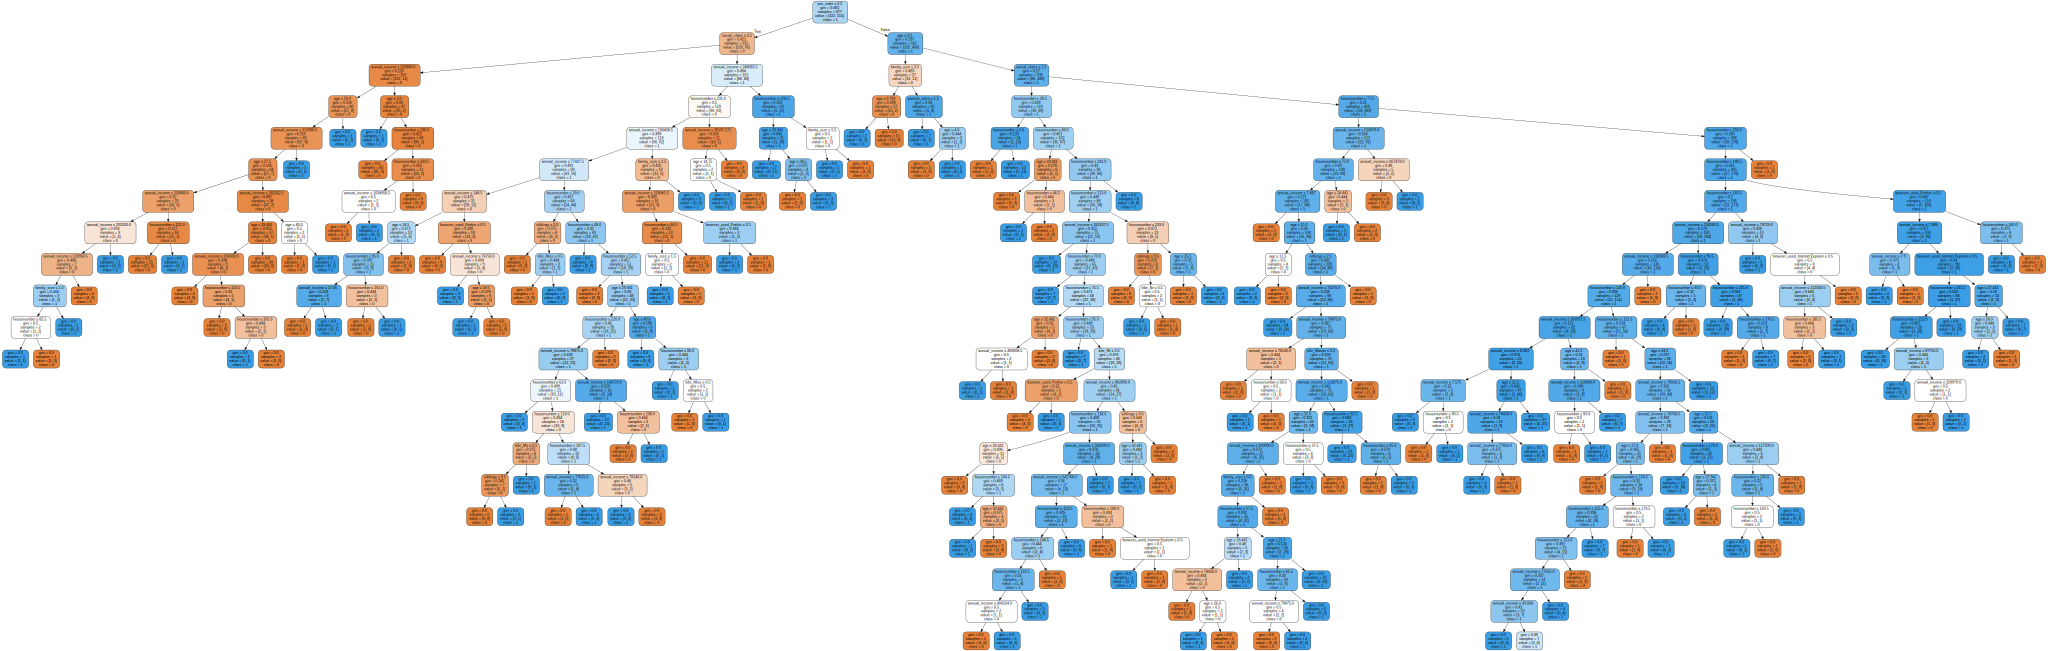

In [0]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=X_train.columns,  
                     class_names=['0', '1'],  
                     filled=True, rounded=True,  
                     special_characters=True)  

graph = graphviz.Source(dot_data)  

graph 

In [0]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, max_depth=1)

clf = clf.fit(X_train, y_train)

predict = clf.predict(X_test)

accuracy_score(y_test, predict)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.7893518518518519

In [0]:
import numpy as np

feat_labels = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30, feat_labels[f], importances[indices[f]]))

 1) age                            0.204842
 2) social_class                   0.197387
 3) siblings                       0.151227
 4) parents_alive                  0.119021
 5) annual_income                  0.114855
 6) housenumber                    0.099920
 7) family_size                    0.040425
 8) browser_used_Firefox           0.013698
 9) browser_used_Internet Explorer 0.011337
10) title_Col                      0.011078
11) title_Countess                 0.009786
12) title_Don                      0.009457
13) title_Dona                     0.005314
14) title_Dr                       0.003644
15) title_Jonkheer                 0.002665
16) title_Lady                     0.001987
17) title_Major                    0.001235
18) title_Master                   0.001030
19) title_Miss                     0.000637
20) title_Mlle                     0.000399
21) title_Mme                      0.000057
22) title_Mr                       0.000000
23) title_Mrs                   

In [0]:
importance = pd.DataFrame(list(zip(importances, feat_labels)), columns=['Importance', 'Name'])
importance.sort_values(by='Importance', ascending=False)

,Importance,Name
26,0.204842,sex_male
4,0.197387,annual_income
5,0.151227,housenumber
1,0.119021,social_class
0,0.114855,age
21,0.099920,title_Mr
6,0.040425,family_size
8,0.013698,browser_used_Internet Explorer
2,0.011337,siblings
7,0.011078,browser_used_Firefox
